In [1]:
import scCube
from scCube import scCube
from scCube.visualization import *
from scCube.utils import *
from matplotlib.pyplot import rc_context
import pandas as pd
import scanpy as sc
import numpy as np
import warnings
import time
warnings.filterwarnings("ignore")

/slurm/home/yrd/fanlab/qianjingyang/.conda/envs/sccube/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = scCube()

In [3]:
sc_data = pd.read_csv('demo_data/demo_sc_data.csv', index_col=0)
sc_meta = pd.read_csv('demo_data/demo_sc_meta.csv', index_col=0)

sc_adata = model.pre_process(sc_data=sc_data, 
                             sc_meta=sc_meta,
                             is_normalized=False)

the input is count matrix, normalizing it firstly...


In [4]:
generate_sc_meta, generate_sc_data = model.train_vae_and_generate_cell(
    sc_adata=sc_adata,
    celltype_key='Cell_type',
    cell_key='Cell',
    target_num=None,
    batch_size=512,
    epoch_num=10000,
    lr=0.0001,
    hidden_size=128,
    save_model=False,
    used_device='cuda:1')

generating by the proportion of cell types of the input scRNA-seq data...
begin vae training...


Train Epoch: 9999: 100%|██████████| 10000/10000 [01:27<00:00, 113.70it/s, loss=0.1135, min_loss=0.1130]


vae training done!


Generate Epoch: 0: 100%|██████████| 408/408 [00:00<00:00, 57229.48it/s]


generated done!
data have been prepared!


In [5]:
# generate spatial patterns for each celltypes first
generate_sc_data_new, generate_sc_meta_new = model.generate_pattern_random(
    generate_sc_data=generate_sc_data,
    generate_sc_meta=generate_sc_meta,
    set_seed=True,
    seed=1234,
    spatial_cell_type=None,
    spatial_dim=2,
    spatial_size=50,
    delta=25,
    lamda=0.75,)

generating spatial coordinates of single cells...
generating spatial patterns of totally 4 cell types...


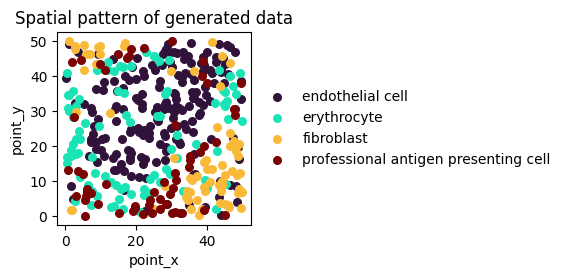

In [6]:
plot_spatial_pattern_scatter(
    obj=generate_sc_meta_new,
    figwidth=2.5,
    figheight=2.5,
    dim=2,
    x="point_x",
    y="point_y",
    label='Cell_type',
    colormap='turbo',
    size=30,
    alpha=1)
plt.show()

In [7]:
# 2000 genes
generate_sc_data_new.shape

(2000, 408)

generating image-based ST data with None targeted genes...
generating with whole genes...


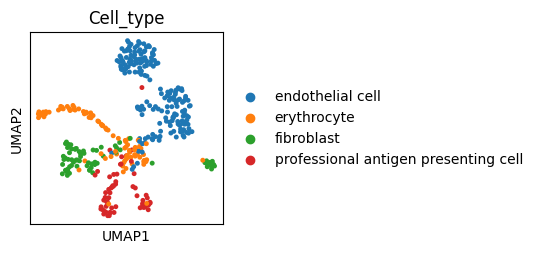

In [8]:
# all genes
st_data, st_meta, st_index = model.generate_image_data_random(
    generate_sc_data=generate_sc_data_new.copy(), # avoid overwriting raw data
    generate_sc_meta=generate_sc_meta_new.copy(),
    gene_type='whole',
    n_gene=None  # the number of genes to select
) 

adata = model.pre_process(sc_data=st_data, 
                          sc_meta=st_meta,
                          is_normalized=True)
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
with rc_context({'figure.figsize': (2.5, 2.5)}):
    sc.pl.umap(adata, color='Cell_type', s=50)

generating image-based ST data with 200 targeted genes...
generating image-based data with 200 targeted HVGs...


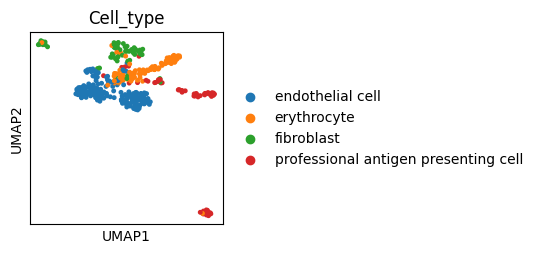

In [10]:
# highly variable genes
st_data, st_meta, st_index = model.generate_image_data_random(
    generate_sc_data=generate_sc_data_new.copy(), # avoid overwriting raw data
    generate_sc_meta=generate_sc_meta_new.copy(),
    gene_type='hvg',
    min_cell=10, # filter the genes expressed in fewer than `min_cell` cells before selected genes
    n_gene=200  # the number of genes to select
)

adata = model.pre_process(sc_data=st_data, 
                          sc_meta=st_meta,
                          is_normalized=True)
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
with rc_context({'figure.figsize': (2.5, 2.5)}):
    sc.pl.umap(adata, color='Cell_type', s=50)

generating image-based ST data with 200 targeted genes...
generating with 200 targeted marker genes...


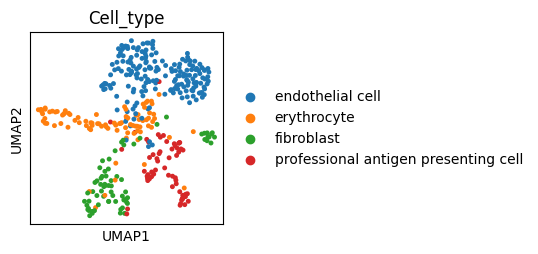

In [11]:
# marker genes of each cell type
st_data, st_meta, st_index = model.generate_image_data_random(
    generate_sc_data=generate_sc_data_new.copy(), # avoid overwriting raw data
    generate_sc_meta=generate_sc_meta_new.copy(),
    gene_type='marker',
    min_cell=10, # filter the genes expressed in fewer than `min_cell` cells before selected genes
    n_gene=200  # the number of genes to select
)

adata = model.pre_process(sc_data=st_data, 
                          sc_meta=st_meta,
                          is_normalized=True)
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
with rc_context({'figure.figsize': (2.5, 2.5)}):
    sc.pl.umap(adata, color='Cell_type', s=50)

generating image-based ST data with 200 targeted genes...
generating with 200 randomly targeted genes...


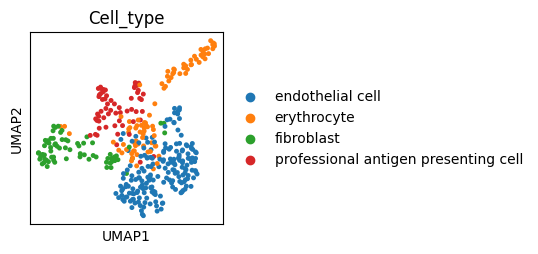

In [12]:
# randomly selected genes
st_data, st_meta, st_index = model.generate_image_data_random(
    generate_sc_data=generate_sc_data_new.copy(), # avoid overwriting raw data
    generate_sc_meta=generate_sc_meta_new.copy(),
    gene_type='random',
    min_cell=10, # filter the genes expressed in fewer than `min_cell` cells before selected genes
    n_gene=200  # the number of genes to select
)

adata = model.pre_process(sc_data=st_data, 
                          sc_meta=st_meta,
                          is_normalized=True)
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
with rc_context({'figure.figsize': (2.5, 2.5)}):
    sc.pl.umap(adata, color='Cell_type', s=50)

In [13]:
# 200 genes
st_data.shape

(200, 408)